# **HEART DISEASE PREDICTION**

## **REGRESI LOGISTIK**
Regresi logistik memiliki beberapa kelebihan dibandingkan teknik analisis lain (Kuncoro, 2001): 
1. Regresi logistik tidak memiliki asumsi normalitas dan heteroskedastisitas. 
2. Variabel independen dalam regresi logistik tipe data dapat campuran baik kontinu, diskrit, dan dikotomis. 
3. Regresi logistik tidak membutuhkan keterbatasan dari variabel independennya. 

## **DATASET**

Dataset ini merupakan database **Cleveland** (data tentang pasien penyakit jantung ) yang diambil yaitu 14 Feature yang berasal dari 76 Feature. Berikut 14 Feature yang digunakan:
1. **Age** : usia pasien
2. **Sex** : jenis kelamin pasien
3. **Chest Pain Type** : Tipe nyeri dada pasien (4 tipe)

   a. Value 1: typical angina
   
   b. Value 2: atypical angina
   
   c. Value 3: non-anginal pain
   
   d. Value 4: asymptomatic
   
   
4. **Trestbps** : Tekanan darah
5. **Chol** : Serum cholestoral (mg/dl)
6. **Fbs** : Gula darah puasa > 120 mg/dl

   a. 1 : Benar
   
   b. 0 : Salah
   
   
7. **Restecg** : Hasil elektrokardiografi

   a. Value 0: normal
   
   b. Value 1: memiliki kelainan gelombang ST-T.
   
   c. Value 2: menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri menurut kriteria Estes.
   
   
8. **Thalach** : Maksimum detak jantung
9. **Exang**
   
   a. 1 : Benar
   
   b. 0 : Salah
   
   
10. **Oldpeak** : Depresi ST
11. **Slope** : Kemiringan segmen ST

    a. Value 1: upsloping

    b. Value 2: flat
    
    c. Value 3: downsloping
    
    
12. **Ca** : Jumlah pembuluh darah (0-3)
13. **Thal**

    a. 3 : normal
    
    b. 6 : fixed defect
    
    c. 7 : reversable defect
    
    
14. **Num** : Diagnosis penyakit jantung 

    a. Value 0: < 50% diameter narrowing
    
    b. Value 1: > 50% diameter narrowing


**Sumber** : <a href="https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction">https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction</a>

## **OBJEKTIF**
1. Membangun model machine learning (Regresi Logistik) dalam memprediksi diagnosa pasien penyakit jantung
2. Mengetahui faktor yang sangat mempengaruhi penyakit jantung

## **IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
from numpy import unique
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# LOAD DATA

In [2]:
df = pd.read_csv("Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
def struktur_data(X):
    print('=======================================================================')
    print('STRUKTUR DATA')
    print('-----------------------------------------------------------------------')
    print(f'Baris : {X.shape[0]}')
    print(f'Kolom : {X.shape[1]}')
    print(f'Nama {X.shape[1]} kolom pada dataset antara lain: ')
    print(f'{X.columns.values}')
    print('=======================================================================')
    print('TYPE-TYPE DATA')
    print('-----------------------------------------------------------------------')
    display(X.info())

In [4]:
struktur_data(df)

STRUKTUR DATA
-----------------------------------------------------------------------
Baris : 270
Kolom : 14
Nama 14 kolom pada dataset antara lain: 
['Age' 'Sex' 'Chest pain type' 'BP' 'Cholesterol' 'FBS over 120'
 'EKG results' 'Max HR' 'Exercise angina' 'ST depression' 'Slope of ST'
 'Number of vessels fluro' 'Thallium' 'Heart Disease']
TYPE-TYPE DATA
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 

None

Berdasarkan hasil diatas dapat disimpulkan bahwa:
1. Dataset terdiri dari **270 baris** dan **14 kolom/feature**.
2. Semua feature memiliki jumlah data **not null** yang sama dengan baris secara keseluruhan sehingga tidak terindikasi adanya missing value.

# DATA PREPROCESSING

In [5]:
#Cek dan penanganan data duplikat
def data_duplikat(X):
  dt_duplicated = X.duplicated().sum()
  if dt_duplicated == 0:
    print('Cek Data Duplicated')
    print('-----------------------------------------------------------')
    print('Jumlah Data Duplicated : {}'.format(dt_duplicated))
  else:
    print('Cek Data Duplicated')
    print('---------------------------------------------------------------------------------------------------------------')
    print(f'Jumlah Data Duplicated Sebelum Handling : {X.duplicated().sum()}')
    print('Berikut 5 baris data duplikat:')
    display(X[X.duplicated()].head())
    X.drop_duplicates(inplace = True)
    print('---------------------------------------------------------------------------------------------------------------')
    print(f'Jumlah Data Duplicated Sesudah Handling : {X.duplicated().sum()}')

In [6]:
data_duplikat(df)

Cek Data Duplicated
-----------------------------------------------------------
Jumlah Data Duplicated : 0


In [7]:
#Identifikasi Kolom
def identifikasi_kolom(X):
    hasil = pd.DataFrame({
        'Total Kategori' : X.nunique(),
        '%' : round((X.nunique()/X.shape[0])*100,2)
    })
    return hasil

In [8]:
identifikasi_kolom(df)

,Total Kategori,%
Age,41,15.19
Sex,2,0.74
Chest pain type,4,1.48
BP,47,17.41
Cholesterol,144,53.33
FBS over 120,2,0.74
EKG results,3,1.11
Max HR,90,33.33
Exercise angina,2,0.74
ST depression,39,14.44


In [9]:
#Data Missing
def data_missing(X):
    hasil = pd.DataFrame({
        'Total Data Missing' : X.isna().sum(),
        '%' : round((X.isna().sum()/X.shape[0])*100,2)
    })
    return hasil

In [10]:
data_missing(df)

,Total Data Missing,%
Age,0,0.0
Sex,0,0.0
Chest pain type,0,0.0
BP,0,0.0
Cholesterol,0,0.0
FBS over 120,0,0.0
EKG results,0,0.0
Max HR,0,0.0
Exercise angina,0,0.0
ST depression,0,0.0


In [11]:
#Cek Outlier
def cekOutlier (X, k):
    col = X.columns
    n = len(col)
    b = (n//k)+1
    plt.figure(figsize=(18,7))
    plt.suptitle('Boxplot for Checking Data Outliers', fontsize = 16, fontweight = "bold")
    for i, kolom in enumerate(col):
        ax = plt.subplot(b, k, i+1)
        ax = plt.subplots_adjust(hspace = 0.3)
        sns.boxplot(data = X, x = kolom, ax = ax)

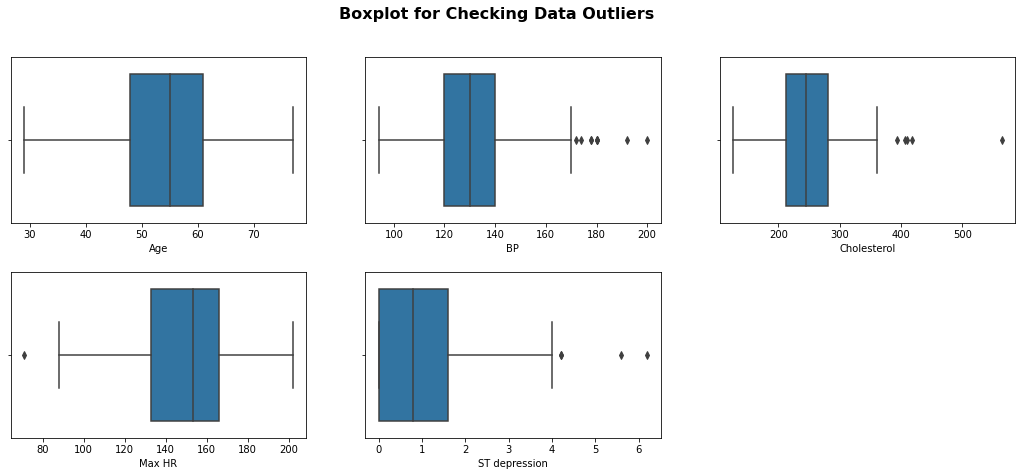

In [12]:
data_continu = df[['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']] #Feature-feature yang type data continous
cekOutlier(data_continu, 3)

Berdasarkan hasil diatas dapat diketahui bahwa:
1. **Tidak** terdapat **data duplikat**.
2. Nilai pada setiap kolom telah sesuai dengan teori atau penjelasan dataset sehingga dapat dikatakan/diasumsikan tidak adanya kesalahan dalam penginputan nilai.
3. **Tidak** terdapat **data yang missing**.
4. Adanya data yang outlier akan tetapi data tersebut keterdapatannya benar atau bukan disebabkan atas kesalahan.
5. Persebaran data berdasarkan box plot dapat diasumsikan data kontinu **tidak normal** karena relatif tidak seimbang.

# EKSPLORASI DATA ANALISIS

In [13]:
#Statistik Deskriptif
data_continu.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


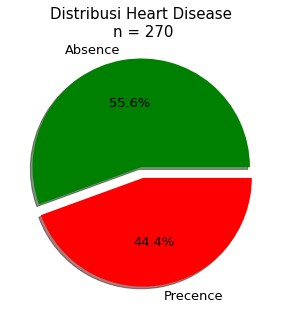

In [18]:
#Proporsi Target
plt.figure(figsize = (7, 5))
labels = ['Absence', 'Precence']
c=["g","r"]
plt.pie(df['Heart Disease'].value_counts(),
        autopct = '%1.1f%%',
        textprops = {'fontsize': 13},
        explode =(0.1, 0),
        labels = labels,
        shadow = True,
        colors = c
        )
plt.title(f'Distribusi Heart Disease \nn = {df.shape[0]}', fontsize = 15)
plt.ylabel('')
plt.show()

Berdasarkan plot diatas dapat disimpulkan bahwa:
1. Data yang digunakan yaitu data sampel diagnosa pasien penyakit jantung sebanyak 270 sampel.
2. 270 data terdiri atas 55.6% pasien tidak terdiagnosa penyakit jantung sedangkan 44.4% terdiagnosa penyakit jantung.
3. Feature target (Diagnosa penyakit jantung) relatif balanced/seimbang.

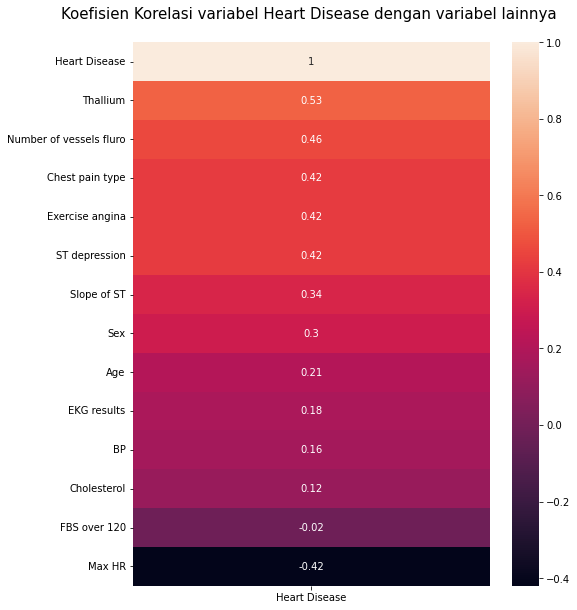

In [20]:
#Korelasi
le = LabelEncoder()
data3 = df.copy()
data3['Heart Disease'] = le.fit_transform(data3['Heart Disease'])
data3

plt.figure(figsize = (8,10))
sns.heatmap(data3.corr().round(2).sort_values('Heart Disease', ascending=False)[['Heart Disease']],annot=True)
plt.title('Koefisien Korelasi variabel Heart Disease dengan variabel lainnya \n', fontsize = 15)
plt.show()

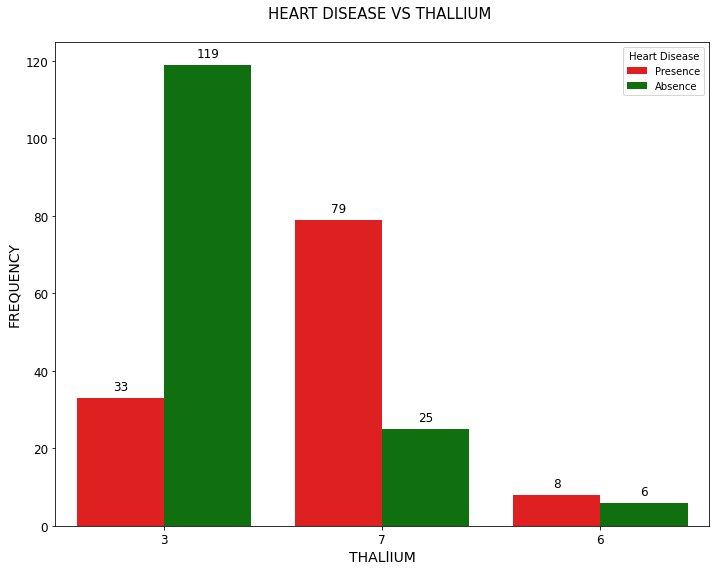

In [24]:
#Distribusi Thallium VS Heart Disease
c=["red","green"]
n_hues = df['Heart Disease'].unique().size
total = df['Thallium'].value_counts()

plt.figure(figsize = (10,8))
ax = sns.countplot(df['Thallium'], 
                   hue= df['Heart Disease'], 
                   order=total.index,
                   palette = c)
plt.title("HEART DISEASE VS THALLIUM \n",fontsize=15)
plt.xlabel("THALlIUM", fontsize = 14)
plt.ylabel("FREQUENCY", fontsize = 14)
plt.tight_layout()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{}'.format(height),
            ha="center", fontsize=12)

Berdasarkan plot diatas dapat disimpulkan bahwa:
1. Hanya variabel/feature **Thallium** yang memiliki **korelasi > 0.5** terhadap variabel/feature **Heart Disease**.
2. Pengaruh diagnosa penyakit jantung pada feature **Thallium** dibagi menjadi tiga kategori. Dimana kategori **Reversable Defect/Cacat tidak permanen** menjadi penyumbang terbanyak pasien terdiagnosa penyakit jantung sedangkan kategori **Normal** menjadi penyumbang terrendah pasien terdiagnosa penyakit jantung.
3. Terdapat variabel/feature yang memiliki **korelasi negatif** yaitu **FBS over 120** dan **Max HR** sehingga kedua feature memiliki hubungan berbanding terbarik dengan feature **Heart Disease**.

In [26]:
#Transformasi Data
le = LabelEncoder()
df['Heart Disease'] = le.fit_transform(df['Heart Disease'])

In [27]:
#Normalisasi
scaling = StandardScaler()

In [30]:
#Data dengan Outlier
X = df.drop('Heart Disease', axis = 1)
y = df['Heart Disease']
col = X.columns
X_sc = pd.DataFrame(X, columns = col)
X_sc[col] = scaling.fit_transform(X)
X_sc.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,1.712094,0.689500,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706


In [31]:
#Spliting Data (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.15, random_state = 42)

# MODELING

In [32]:
parameters = {
    'C' : np.logspace(-2,6,9),
    'penalty' : ['l1', 'l2']
}

lg = LogisticRegression(random_state = 42, max_iter=10000)

In [33]:
def model(models, parameter, cv, Xtrain, ytrain):
    grid = GridSearchCV(models, parameter, n_jobs = 1, cv = cv).fit(Xtrain, ytrain)
    print("Tuned Parameters: {}".format(grid.best_params_))

In [35]:
#Dangan dengan Outlier
model(lg, parameters, 10, X_train, y_train)

Tuned Parameters: {'C': 0.01, 'penalty': 'l2'}


## EVALUASI MODEL

In [36]:
def evaluasi_model(model, Xtrain, ytrain, Xtest, ytest):
    model = model
    ypred = model.predict(Xtest)
    print("EVALUASI MODEL")
    print("=======================================================")
    print(classification_report(ytest, ypred))
    print("=======================================================")
    print('Training set score : {:.2f}'.format(model.score(Xtrain, ytrain)))
    print('Testing set score  : {:.2f}'.format(model.score(Xtest, ytest)))
    print("=======================================================")
    cm = confusion_matrix(ytest, ypred)
    sns.heatmap(cm, annot = True)
    plt.title('Confusion Matrix\n n = {} \n'.format(Xtest.shape[0]), fontsize=12)
    plt.show()
    print("=======================================================")

EVALUASI MODEL
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        23
           1       1.00      0.67      0.80        18

    accuracy                           0.85        41
   macro avg       0.90      0.83      0.84        41
weighted avg       0.88      0.85      0.85        41

Training set score : 0.86
Testing set score  : 0.85


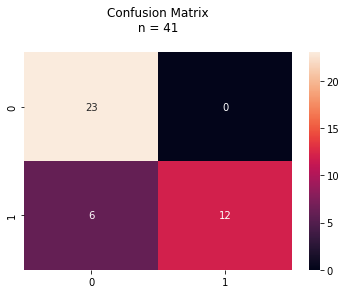

In [37]:
model = LogisticRegression(C = 0.01, penalty = 'l2', random_state=42).fit(X_train,y_train)
evaluasi_model(model, X_train, y_train, X_test, y_test)

## Kesimpulan

Berdasarkan hasil diatas dapat diketahui bahwa:
1. Model regresi logistik yang dibangun untuk memprediksi pasien diagnosa penyakit jantung didapatkan akurasi sebesar 85% sehingga model yang dibuat telah baik.
2. Faktor yang paling mempengaruhi diagnosa penyakit jantung yaitu Thallium dengan nilai korelasi sebesar 53%. Dimana kategori Reversable Defect/Cacat tidak permanen menjadi penyumbang terbanyak pasien terdiagnosa penyakit jantung sedangkan kategori Normal menjadi penyumbang terrendah pasien terdiagnosa penyakit jantung.

Rekomendasi:
1. Melakukan modeling menggunakan metode lain maupun parameter-parameter lainnya pada saat tuning hyperparameter guna mendapatkan model yang lebih baik.
2. Melakukan perlakuan khusus terhadap Thallium agar pasien tidak terjadinya kecacatan yang berulang/berubah pada Thallium yang menyumbangkan terbanyak pasien terdiagnosa penyakit jantung.